<a href="https://colab.research.google.com/github/JANG-hyeonjun/git_hub-test/blob/master/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline 

# 데이터 세트의 URL을 설정
#url = "http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
#f = request.urlopen(url)

# google drive
url  = '/content/drive/My Drive/hufs/Data Mining/demacia 2차 수정.csv'
#url  = '/content/drive/My Drive/hufs/Data Mining/grade인공지능용.csv'
f = open(url)


# random seed for reproducibility
numpy.random.seed(2)

# 데이터 세트를 불러옵니다. 
dataset = numpy.loadtxt(f, delimiter=",")

In [ ]:
# 데이터세트를 두 가지 원인(X) 과 결과(Y)로 나누어 줍니다. 
#X = dataset[:,0:5]
#Y = dataset[:,5]

X = dataset[:,0:8]
Y = dataset[:,8]

# create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) # input layer requires input_dim param
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid instead of relu for final probability between 0 and 1

# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# call the function to fit to the data (training the network)
# verbose=0 는 프로그래스를 숨깁니다.
history = model.fit(X, Y, epochs = 500, batch_size=10, verbose=0)

# 모델의 정확도를 계산합니다.
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s 67us/step

accuracy: 82.55%


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epoch'), Text(0.5, 1.0, 'model loss')]

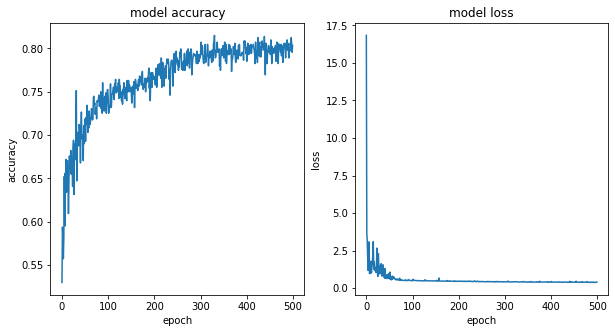

In [ ]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(10, 5))

# 모델의 정확도를 그립니다.
ax0.plot(history.history['accuracy']) 
ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')

# 모델의 오차를 그립니다.
ax1.plot(history.history['loss'])
ax1.set(title='model loss', xlabel='epoch', ylabel='loss')

In [ ]:
# 가상의 환자 데이터 입력
patient_1 = numpy.array([[0, 120, 65, 50, 500, 31, 0.47, 70]]) # 마지막 칸이 나이인데 나이에 따라 확률이 확연하게, 유의미하게 바뀌는 것을 확인.

#print(patient_1)

# 모델로 예측하기
prediction = model.predict(patient_1)

# 예측결과 출력하기
print(prediction*100)

[[36.560062]]
